# Decision Trees

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Training and visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [4]:
from graphviz import Source
from sklearn.tree import export_graphviz

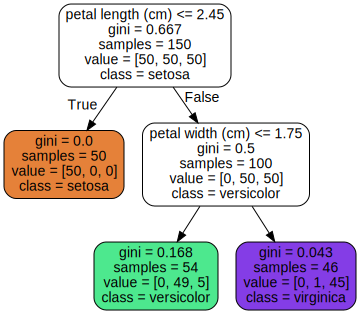

In [5]:
export_graphviz(tree_clf,
                out_file="data/iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Source.from_file("data/iris_tree.dot")

In [6]:
from matplotlib.colors import ListedColormap

In [45]:
def make_mesh(lims, h=100):
    x = np.linspace(lims[0], lims[1], h)
    y = np.linspace(lims[2], lims[3], h)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

In [46]:
def plot_decision_boundary(clf,
                           X,
                           y,
                           lims,
                           ax,
                           legend=False,
                           plot_training=True):
    x1, x2 = make_mesh(lims, 100)

    X_new = np.c_[x1.flatten(), x2.flatten()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        for ind, (label, style) in enumerate(zip(labels, styles)):
            ax.plot(X[:, 0][y == ind], X[:, 1][y == ind], style, label=label)
    if iris:
        ax.set(xlabel="Petal length", ylabel="Petal width")
    else:
        ax.set(xlabel=r"$x_1$", ylabel=r"$x_2$")
    if legend:
        ax.legend(loc="lower right")

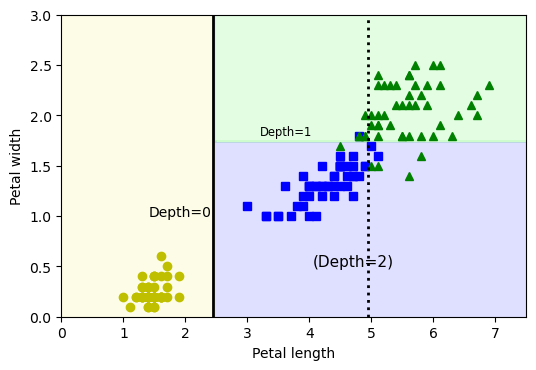

In [70]:
lims = [0, 7.5, 0, 3]

labels = ["Iris setosa", "Iris versicolor", "Iris virginica"]
styles = ["yo", "bs", "g^"]

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_decision_boundary(tree_clf, X, y, lims, ax=ax)
splits = [2.45, 1.75, 4.95, 4.85]

ax.axvline(splits[0], lims[2], lims[3], c='k', ls="-", lw=2)
ax.axhline(splits[1], splits[0], lims[1], c='k', ls="--", lw=2)
ax.axvline(splits[2], lims[2], splits[1], c='k', ls=":", lw=2)
ax.axvline(splits[3], splits[1], lims[3], c='k', ls=":", lw=2)
ax.text(1.40, 1.0, "Depth=0", fontsize='medium')
ax.text(3.2, 1.80, "Depth=1", fontsize='small')
ax.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Predicting

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

# High Variance

We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree.
Now let's show that training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. To show this, we will set `random_state` to a different value than earlier:

In [22]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

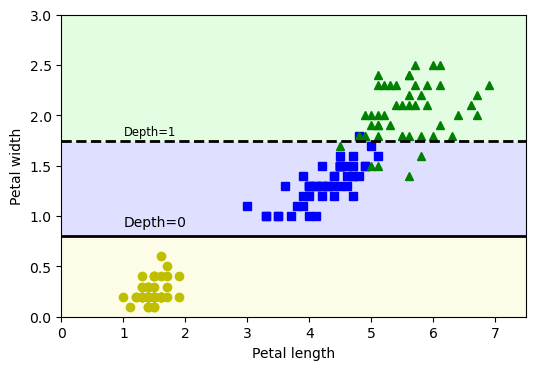

In [60]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

lims = [0, 7.5, 0, 3]
splits = [0.8, 1.75]

plot_decision_boundary(tree_clf_tweaked, X, y, lims=lims, ax=ax, legend=False)
ax.axhline(splits[0], lims[0], lims[1], c='k', ls="-", lw=2)
ax.axhline(splits[1], lims[0], lims[1], c='k', ls="--", lw=2)
ax.text(1.0, 0.9, "Depth=0", fontsize='medium')
ax.text(1.0, 1.80, "Depth=1", fontsize='small')

plt.show()

In [24]:
from sklearn.datasets import make_moons

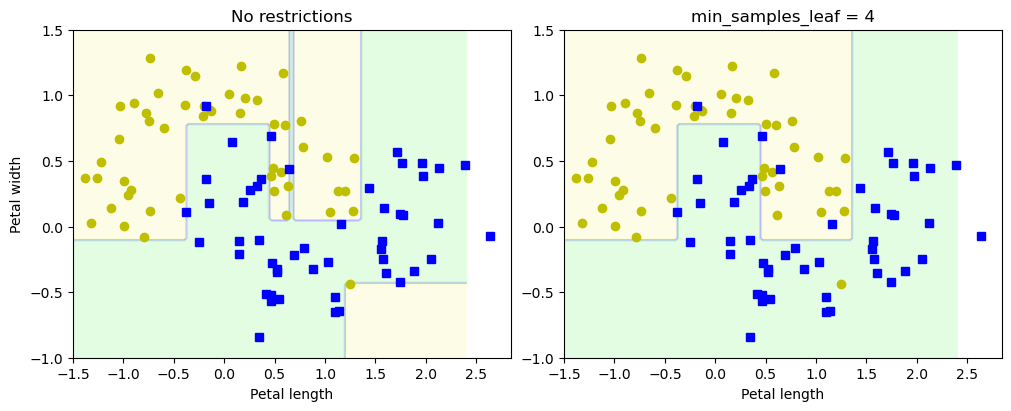

In [52]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

lims = [-1.5, 2.4, -1, 1.5]

_, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, constrained_layout=True)

plot_decision_boundary(deep_tree_clf1, Xm, ym, lims=lims, ax=axes[0])
axes[0].set(title="No restrictions")
plot_decision_boundary(deep_tree_clf2, Xm, ym, lims=lims, ax=axes[1])
axes[1].set(title=f"min_samples_leaf = {deep_tree_clf2.min_samples_leaf}",
            ylabel="")

plt.show()

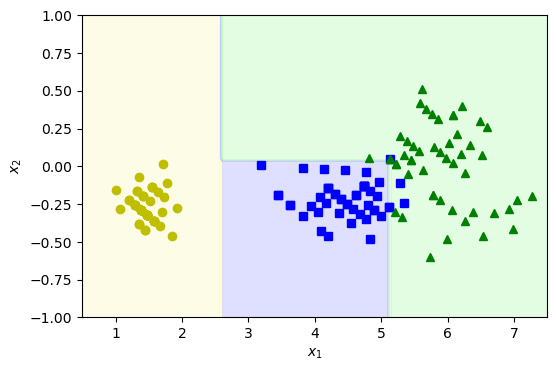

In [54]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

lims = [0.5, 7.5, -1.0, 1]

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

plot_decision_boundary(tree_clf_r, Xr, y, lims=lims, ax=ax)

plt.show()

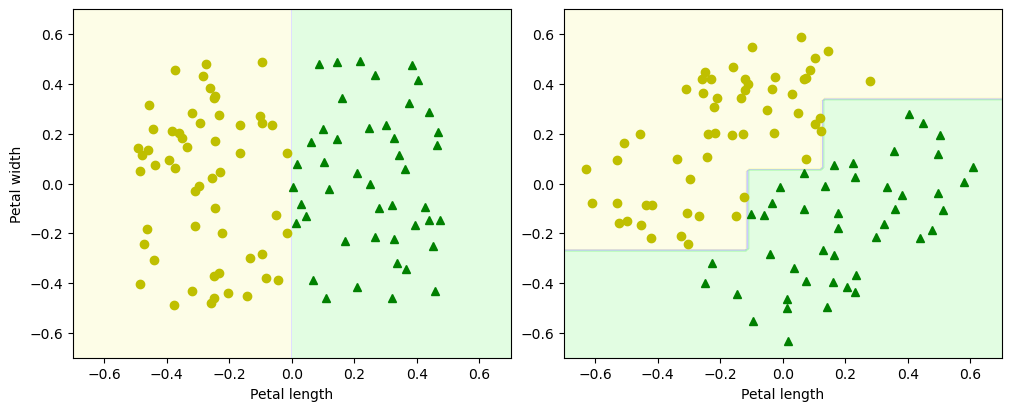

In [75]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

lims = [-0.7, 0.7, -0.7, 0.7]

_, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, constrained_layout=True)

plot_decision_boundary(tree_clf_s, Xs, ys, lims=lims, ax=axes[0])
plot_decision_boundary(tree_clf_sr, Xsr, ys, lims=lims, ax=axes[1])
axes[1].set(ylabel="")

plt.show()

# Regression trees

In [76]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [83]:
def plot_regression_predictions(tree_reg,
                                X,
                                y,
                                ax,
                                lims=[0, 1, -0.2, 1],
                                ylabel="$y$"):
    x1 = np.linspace(lims[0], lims[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    ax.set(xlabel="$x_1$")
    if ylabel:
        ax.set(ylabel=ylabel)
    ax.plot(X, y, "b.")
    ax.plot(x1, y_pred, "r.-", lw=2, label=r"$\hat{y}$")

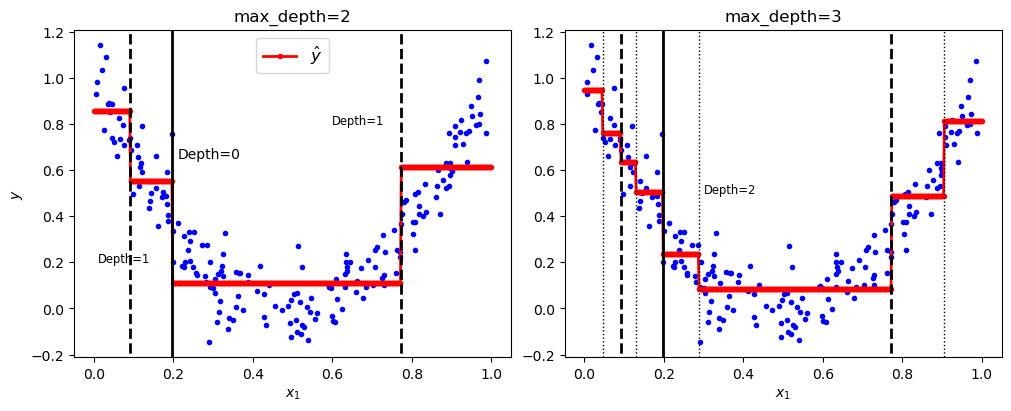

In [88]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

_, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, constrained_layout=True)

plot_regression_predictions(tree_reg1, X, y, ax=axes[0])

for split, ls in ((0.1973, "-"), (0.0917, "--"), (0.7718, "--")):
    axes[0].axvline(split, -0.2, 1, c='k', ls=ls, lw=2)
axes[0].text(0.21, 0.65, "Depth=0", fontsize='medium')
axes[0].text(0.01, 0.2, "Depth=1", fontsize='small')
axes[0].text(0.6, 0.8, "Depth=1", fontsize='small')
axes[0].legend(loc="upper center", fontsize='large')
axes[0].set(title="max_depth=2")

plot_regression_predictions(tree_reg2, X, y, ax=axes[1], ylabel=None)
for split, ls in ((0.1973, "-"), (0.0917, "--"), (0.7718, "--")):
    axes[1].axvline(split, -0.2, 1, c='k', ls=ls, lw=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    axes[1].axvline(split, -0.2, 1, c="k", ls=':', lw=1)
axes[1].text(0.3, 0.5, "Depth=2", fontsize='small')
axes[1].set(title="max_depth=3")

plt.show()

In [90]:
export_graphviz(
        tree_reg1,
        out_file="data/reg_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

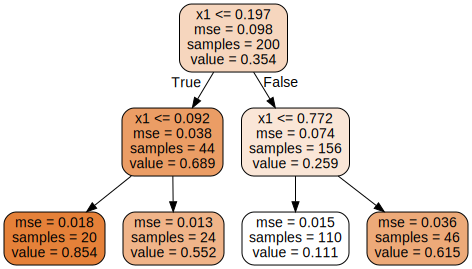

In [91]:
Source.from_file("data/reg_tree.dot")

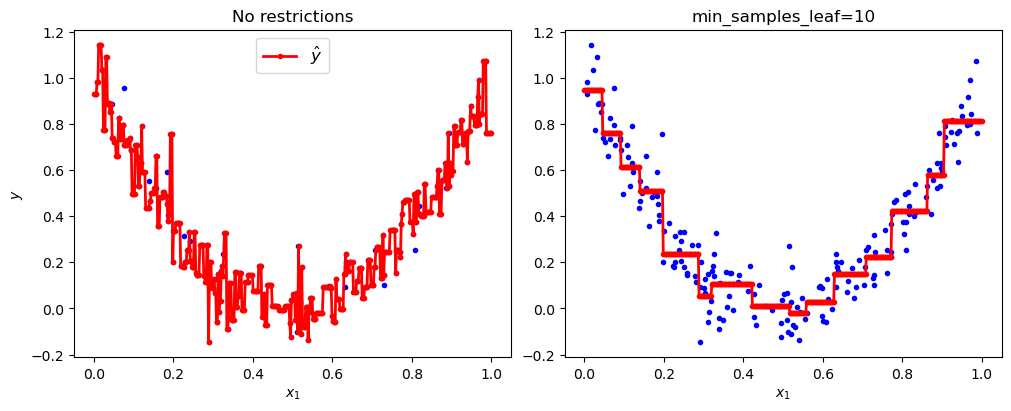

In [92]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

_, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, constrained_layout=True)

lims = [0, 1, -0.2, 1.1]
y_preds = [y_pred1, y_pred2]

for y_pred, ax in zip(y_preds, axes.flatten()):
    ax.plot(X, y, "b.")
    ax.plot(x1, y_pred, "r.-", lw=2, label=r"$\hat{y}$")
    ax.set(xlabel="$x_1$")

axes[0].set(ylabel="$y$", title="No restrictions")
axes[0].legend(loc="upper center", fontsize='large')
axes[1].set(title=f"min_samples_leaf={tree_reg2.min_samples_leaf}", )

plt.show()

# Exercise solutions

## Train and fine-tune a Decision Tree

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [93]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using `train_test_split()`.

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.

In [ ]:
from sklearn.model_selection import GridSearchCV

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.7s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
params = {
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              verbose=1,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [ ]:
from sklearn.metrics import accuracy_score

0.8695

In [ ]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees,
                  test_size=len(X_train) - n_instances,
                  random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [ ]:
from sklearn.base import clone

0.8054499999999999

In [ ]:
forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)

    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [ ]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [ ]:
from scipy.stats import mode

In [ ]:
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [ ]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872